In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
sns.set_style('whitegrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_1 = pd.read_csv('datos_venta_limpios.csv')
df_1

,Month,Fecha,Operacion,Clase,No_Factura,Cliente,Producto,KG,Precio_Unit_Venta,Ganancia_USD,Moneda_de_Venta,Ganancia_MXN,Moneda_MXN,Costo_Unit_Manufactura,Tipo_de_Cambio,Conversion_Ganancia_en_Dolares,lbs,Costo_Tot_Manufactura,Mes
0,1.0,01/03/2019,Venta,NAC,27958,Cliente 6,Producto 70,25.0,588.22,750.75,USD,14705.54,MXP,224.75,19.59,750.75,55.1125,5618.86,Enero
1,1.0,01/03/2019,Venta,NAC,27953,Cliente 6,Producto 53,500.0,79.92,2040.00,USD,39959.10,MXP,64.88,19.59,2040.00,1102.2500,32440.05,Enero
2,1.0,01/03/2019,Venta,NAC,27960,Cliente 6,Producto 213,25.0,211.55,270.00,USD,5288.71,MXP,109.11,19.59,270.00,55.1125,2727.78,Enero
3,1.0,01/03/2019,Venta,NAC,27952,Cliente 6,Producto 133,300.0,217.42,3330.00,USD,65227.38,MXP,120.77,19.59,3330.00,661.3500,36231.51,Enero
4,1.0,01/03/2019,Venta,NAC,27952,Cliente 6,Producto 5,1200.0,149.45,9156.00,USD,179345.88,MXP,114.11,19.59,9156.00,2645.4000,136933.80,Enero
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7438,12.0,19/12/19,Cancelacion,NAC,1879,Cliente 91,Producto 54,0.0,85.22,8522.00,MXP,8522.00,MXP,56.49,18.92,450.51,0.0000,0.00,Diciembre
7439,12.0,19/12/19,Cancelacion,NAC,1879,Cliente 91,Producto 54,0.0,85.22,2130.50,MXP,2130.50,MXP,56.49,18.92,112.63,0.0000,0.00,Diciembre
7440,12.0,19/12/19,Cancelacion,NAC,1880,Cliente 155,Producto 118,0.0,360.55,1429.50,USD,27041.14,MXP,328.20,18.92,1429.50,0.0000,0.00,Diciembre
7441,12.0,19/12/19,Cancelacion,NAC,1884,Cliente 133,Producto 219,125.0,67.67,446.25,USD,8458.31,MXP,52.04,18.95,446.25,-275.5625,-6504.88,Diciembre


In [3]:
#df_2 = df_1[['Producto','Precio_Unit_Venta','Ganancia_MXN']]  #Hacer data frame a partir de otro df

#Cambio de variable categórica a numérica
df_2_1 = df_1['Precio_Unit_Venta']
df_2_2 = df_1['Producto'].str.replace('Producto ','')
df_2_2 = pd.to_numeric(df_2_2, errors = 'coerce', downcast='integer')
df_2_3 = df_1['Cliente'].str.replace('Cliente ','')
df_2_3 = pd.to_numeric(df_2_3, errors = 'coerce', downcast='integer')
df_2 = pd.concat([df_2_3, df_2_2, df_2_1], axis = 1)
df_2['Ganancia_MXN'] = df_1['Ganancia_MXN']
df_2

,Cliente,Producto,Precio_Unit_Venta,Ganancia_MXN
0,6,70,588.22,14705.54
1,6,53,79.92,39959.10
2,6,213,211.55,5288.71
3,6,133,217.42,65227.38
4,6,5,149.45,179345.88
...,...,...,...,...
7438,91,54,85.22,8522.00
7439,91,54,85.22,2130.50
7440,155,118,360.55,27041.14
7441,133,219,67.67,8458.31


<AxesSubplot:xlabel='Precio_Unit_Venta'>

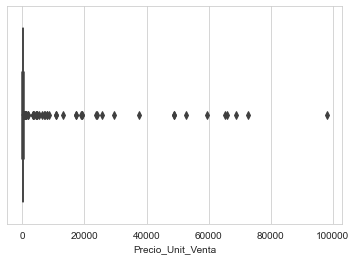

In [4]:
df_no_outlayers = df_2[df_2['Precio_Unit_Venta'] < 100000]
sns.boxplot(x = df_no_outlayers['Precio_Unit_Venta'])

In [5]:
df_1_num = df_1
df_1_num[['Producto', 'Cliente']] = df_2[['Producto', 'Cliente']]
df_1_num.tail(20)

,Month,Fecha,Operacion,Clase,No_Factura,Cliente,Producto,KG,Precio_Unit_Venta,Ganancia_USD,Moneda_de_Venta,Ganancia_MXN,Moneda_MXN,Costo_Unit_Manufactura,Tipo_de_Cambio,Conversion_Ganancia_en_Dolares,lbs,Costo_Tot_Manufactura,Mes
7423,12.0,19/12/19,Venta,NAC,32233,135,107,50.0,175.17,463.00,USD,8758.34,MXP,105.09,18.92,463.00,110.2250,5254.47,Diciembre
7424,12.0,19/12/19,Venta,NAC,32232,69,130,2000.0,113.50,12000.00,USD,226998.00,MXP,86.33,18.92,12000.00,4409.0000,172667.41,Diciembre
7425,12.0,19/12/19,Venta,NAC,32234,118,130,25.0,290.68,7267.00,MXP,7267.00,MXP,235.66,18.92,384.16,55.1125,5891.61,Diciembre
7426,12.0,19/12/19,Venta,NAC,32231,155,60,50.0,239.10,632.00,USD,11955.23,MXP,112.07,18.92,632.00,110.2250,5603.27,Diciembre
7427,12.0,19/12/19,Venta,NAC,32230,6,222,500.0,118.23,3125.00,USD,59114.05,MXP,61.86,18.92,3125.00,1102.2500,30932.20,Diciembre
7428,12.0,19/12/19,Cancelacion,NAC,1878,52,111,0.0,49.01,12252.50,MXP,12252.50,MXP,59.18,18.92,647.71,0.0000,0.00,Diciembre
7429,12.0,19/12/19,Venta,NAC,32225,12,60,75.0,321.58,1275.00,USD,24118.54,MXP,112.07,18.92,1275.00,165.3375,8404.91,Diciembre
7430,12.0,19/12/19,Cancelacion,NAC,1883,155,118,0.0,360.55,1906.00,USD,36054.85,MXP,328.20,18.92,1906.00,0.0000,0.00,Diciembre
7431,12.0,19/12/19,Cancelacion,NAC,1882,155,118,0.0,360.55,3812.00,USD,72109.70,MXP,328.20,18.92,3812.00,0.0000,0.00,Diciembre
7432,12.0,19/12/19,Venta,NAC,32228,6,184,100.0,296.99,1570.00,USD,29698.91,MXP,222.55,18.92,1570.00,220.4500,22255.21,Diciembre


In [6]:
df_1_num_dropped = df_1_num.drop(columns=["Fecha","No_Factura","Moneda_MXN","Mes","Conversion_Ganancia_en_Dolares"])
df_1_num_dropped

,Month,Operacion,Clase,Cliente,Producto,KG,Precio_Unit_Venta,Ganancia_USD,Moneda_de_Venta,Ganancia_MXN,Costo_Unit_Manufactura,Tipo_de_Cambio,lbs,Costo_Tot_Manufactura
0,1.0,Venta,NAC,6,70,25.0,588.22,750.75,USD,14705.54,224.75,19.59,55.1125,5618.86
1,1.0,Venta,NAC,6,53,500.0,79.92,2040.00,USD,39959.10,64.88,19.59,1102.2500,32440.05
2,1.0,Venta,NAC,6,213,25.0,211.55,270.00,USD,5288.71,109.11,19.59,55.1125,2727.78
3,1.0,Venta,NAC,6,133,300.0,217.42,3330.00,USD,65227.38,120.77,19.59,661.3500,36231.51
4,1.0,Venta,NAC,6,5,1200.0,149.45,9156.00,USD,179345.88,114.11,19.59,2645.4000,136933.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7438,12.0,Cancelacion,NAC,91,54,0.0,85.22,8522.00,MXP,8522.00,56.49,18.92,0.0000,0.00
7439,12.0,Cancelacion,NAC,91,54,0.0,85.22,2130.50,MXP,2130.50,56.49,18.92,0.0000,0.00
7440,12.0,Cancelacion,NAC,155,118,0.0,360.55,1429.50,USD,27041.14,328.20,18.92,0.0000,0.00
7441,12.0,Cancelacion,NAC,133,219,125.0,67.67,446.25,USD,8458.31,52.04,18.95,-275.5625,-6504.88


In [7]:
#sns.pairplot(df_1);

In [8]:
#scatter = sns.scatterplot(x = df_1['Costo_Tot_Manufactura'], y = df_1['lbs'])
#scatter.set(title = 'Costo de manufactura vs Lbs de producto vendidos')

In [9]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df_1_num_catnum = df_1_num_dropped
df_1_num_catnum["Moneda_de_Venta"] =  ord_enc.fit_transform(df_1_num_catnum[["Moneda_de_Venta"]])
df_1_num_catnum["Operacion"] =  ord_enc.fit_transform(df_1_num_catnum[["Operacion"]])
df_1_num_catnum["Clase"] =  ord_enc.fit_transform(df_1_num_catnum[["Clase"]])
df_1_num_catnum[['lbs','Costo_Tot_Manufactura']] = df_1_num_catnum[['lbs','Costo_Tot_Manufactura']].abs()
df_1_num_catnum = df_1_num_catnum.drop(df_1_num_catnum[df_1_num_catnum['KG']==0].index).reset_index(drop=True)
df_1_num_catnum.tail(20)

,Month,Operacion,Clase,Cliente,Producto,KG,Precio_Unit_Venta,Ganancia_USD,Moneda_de_Venta,Ganancia_MXN,Costo_Unit_Manufactura,Tipo_de_Cambio,lbs,Costo_Tot_Manufactura
6575,12.0,1.0,2.0,86,130,200.0,170.06,1798.00,1.0,34011.86,104.95,18.92,440.9000,20989.12
6576,12.0,1.0,2.0,72,220,500.0,122.58,3240.00,1.0,61289.45,53.34,18.92,1102.2500,26667.95
6577,12.0,1.0,2.0,85,234,450.0,105.74,2515.50,1.0,47584.44,67.17,18.92,992.0250,30225.60
6578,12.0,1.0,2.0,118,219,500.0,54.63,27315.00,0.0,27315.00,40.71,18.92,1102.2500,20356.30
6579,12.0,1.0,2.0,141,105,50.0,191.06,505.00,1.0,9552.84,69.73,18.92,110.2250,3486.37
6580,12.0,1.0,2.0,127,18,4896.0,34.24,8861.76,1.0,167633.66,33.83,18.92,10793.2320,165636.09
6581,12.0,1.0,2.0,12,194,272.0,112.74,1621.12,1.0,30665.91,78.75,18.92,599.6240,21420.87
6582,12.0,1.0,2.0,6,160,175.0,114.63,1060.50,1.0,20060.95,69.26,18.92,385.7875,12120.15
6583,12.0,1.0,2.0,6,160,75.0,114.63,454.50,1.0,8597.55,69.26,18.92,165.3375,5194.35
6584,12.0,1.0,2.0,135,107,50.0,175.17,463.00,1.0,8758.34,105.09,18.92,110.2250,5254.47


In [10]:
#df_1_num["Clase"].value_counts()
#df_1_num_catnum.tail(15)

In [11]:
df_1_num_catnum["Operacion"] = pd.to_numeric(df_1_num_catnum["Operacion"]).astype(int)
df_1_num_catnum["Clase"] = pd.to_numeric(df_1_num_catnum["Clase"]).astype(int)
df_1_num_catnum["Moneda_de_Venta"] = pd.to_numeric(df_1_num_catnum["Moneda_de_Venta"]).astype(int)

In [12]:
df_1_num_catnum.dtypes

Month                     float64
Operacion                   int32
Clase                       int32
Cliente                     int16
Producto                    int16
KG                        float64
Precio_Unit_Venta         float64
Ganancia_USD              float64
Moneda_de_Venta             int32
Ganancia_MXN              float64
Costo_Unit_Manufactura    float64
Tipo_de_Cambio            float64
lbs                       float64
Costo_Tot_Manufactura     float64
dtype: object

In [13]:
#print(df_1_num_catnum.info())
#print(df_1_num_catnum.isnull().any())
df_1_num_catnum.to_csv('datos_para_ML.csv', index = False)

In [14]:
X = df_1_num_catnum.drop("Operacion", axis = 1)
print(X.shape)
print(X.describe().T.round(2))

(6595, 13)
                         count      mean        std    min      25%       50%  \
Month                   6595.0      6.48       3.32   1.00     4.00      6.00   
Clase                   6595.0      1.93       0.36   0.00     2.00      2.00   
Cliente                 6595.0     52.20      49.85   1.00     6.00     30.00   
Producto                6595.0    128.17      50.96   1.00   107.00    127.00   
KG                      6595.0    622.16    1796.83   6.00    50.00    125.00   
Precio_Unit_Venta       6595.0    188.76     397.80   0.00    98.69    154.58   
Ganancia_USD            6595.0   9892.35   69353.28   0.00   571.25   1544.00   
Moneda_de_Venta         6595.0      0.86       0.35   0.00     1.00      1.00   
Ganancia_MXN            6595.0  70557.83  459989.85   0.00  9140.40  21339.94   
Costo_Unit_Manufactura  6595.0    123.18      88.30   0.00    65.61    100.91   
Tipo_de_Cambio          6595.0     19.27       0.27  18.77    19.08     19.18   
lbs              

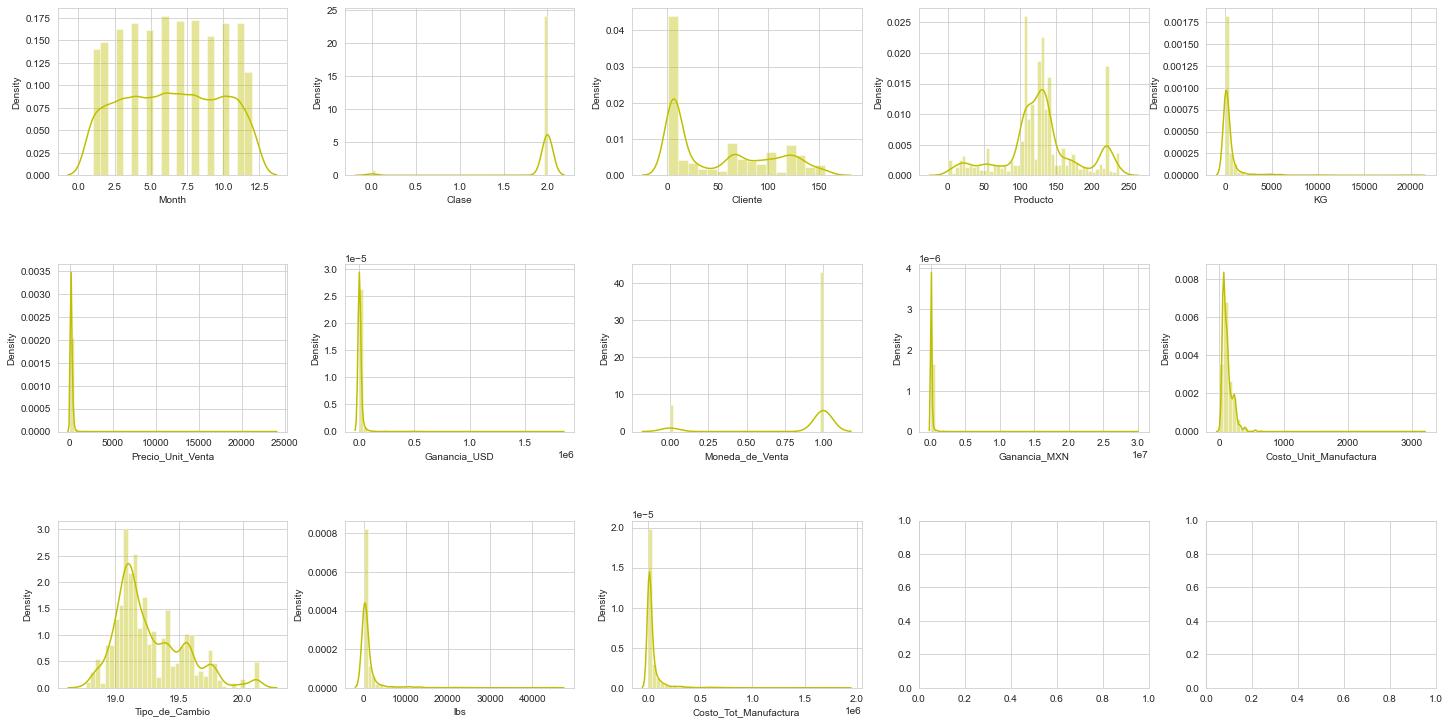

In [15]:
fig, ax = plt.subplots(ncols=5, nrows=3, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in X.items():
    sns.distplot(value, color='y', ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

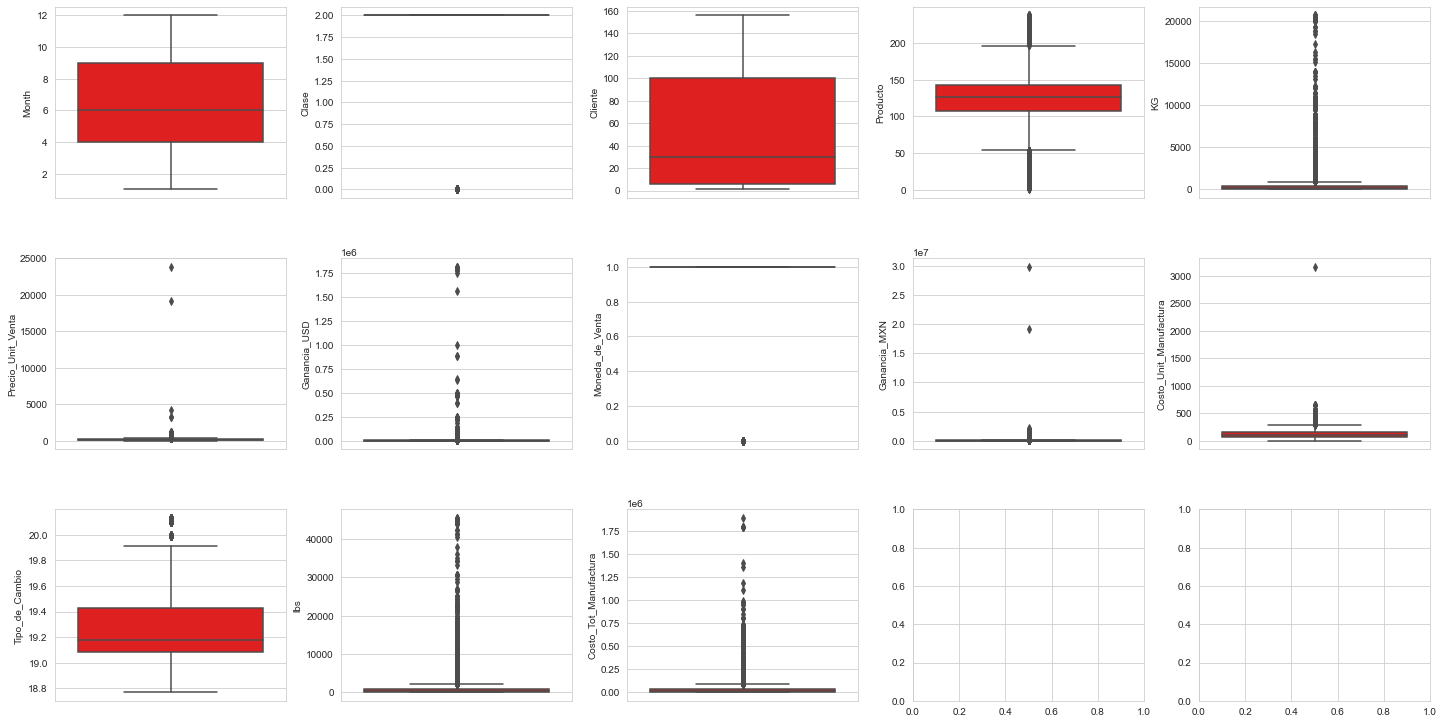

In [16]:
fig, ax = plt.subplots(ncols=5, nrows=3, figsize=(20,10))
index = 0
ax = ax.flatten()
 
for col, value in X.items():
    sns.boxplot(y=col, data=X, color='r', ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

(6595,)
   y_variable  percentage_count
1           0          0.013343
0           1          0.986657


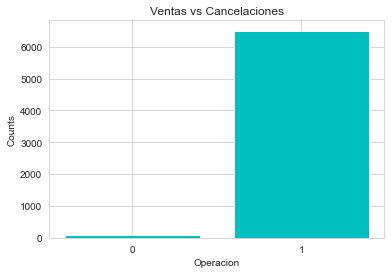

In [17]:
y = df_1_num_catnum["Operacion"]
print(y.shape)
print(y.value_counts(normalize = True)
      .reset_index().rename(columns = {'index': 'y_variable', 'Operacion': 'percentage_count'})
      .sort_values(by = "percentage_count"))
labels, counts = np.unique(y, return_counts=True)
plt.bar(labels, counts, align='center', color = "c")
plt.title("Ventas vs Cancelaciones")
plt.xlabel("Operacion")
plt.ylabel("Counts")
plt.xticks(labels)
plt.show()

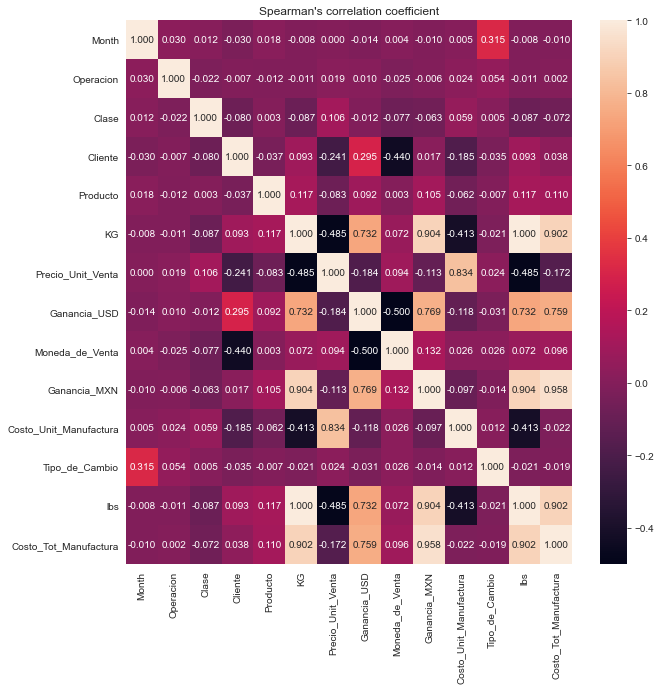

In [18]:
corr_spearman = df_1_num_catnum.corr(method = 'spearman')
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_spearman, annot = True, fmt=".3f").set_title(
    "Spearman's correlation coefficient")
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

In [20]:
pt = PowerTransformer()
X_scaled = pt.fit_transform(X)

df_scaled = pd.DataFrame(X_scaled)
print(df_scaled.describe().T.round(2))

     count  mean  std   min   25%   50%   75%    max
0   6595.0  -0.0  1.0 -1.77 -0.71 -0.08  0.77   1.57
1   6595.0  -0.0  1.0 -5.32  0.19  0.19  0.19   0.19
2   6595.0   0.0  1.0 -2.00 -1.05  0.10  1.03   1.38
3   6595.0   0.0  1.0 -2.51 -0.41 -0.02  0.28   2.13
4   6595.0   0.0  1.0 -3.03 -0.75 -0.00  0.78   2.30
5   6595.0   0.0  1.0 -6.52 -0.69  0.01  0.61  10.05
6   6595.0  -0.0  1.0 -6.89 -0.74 -0.05  0.68   3.42
7   6595.0  -0.0  1.0 -2.44  0.41  0.41  0.41   0.41
8   6595.0   0.0  1.0 -7.87 -0.70 -0.06  0.63   5.17
9   6595.0  -0.0  1.0 -5.76 -0.73 -0.06  0.66   6.93
10  6595.0  -0.0  1.0 -2.19 -0.69 -0.28  0.66   2.76
11  6595.0   0.0  1.0 -3.10 -0.75 -0.00  0.78   2.31
12  6595.0  -0.0  1.0 -6.35 -0.71 -0.09  0.61   3.51


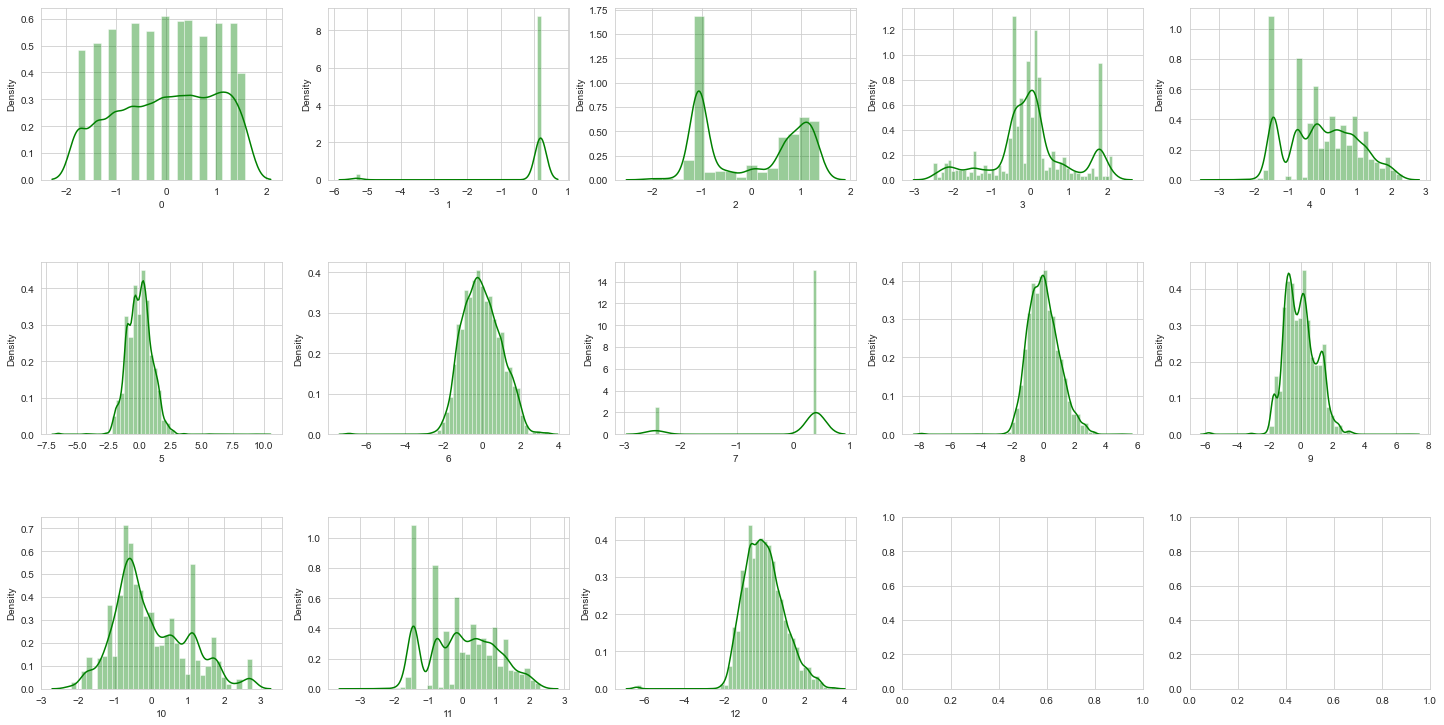

In [21]:
fig, ax = plt.subplots(ncols=5, nrows=3, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df_scaled.items():
    sns.distplot(value, color='g', ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

In [22]:
#Quitamos variables que no me van a servir como descriptores
X_dropped = X.drop(columns = ["Clase","Moneda_de_Venta"])

X_scaled_2 = pt.fit_transform(X_dropped)

df_scaled_2 = pd.DataFrame(X_scaled_2)
print(df_scaled_2.describe().T.round(2))

     count  mean  std   min   25%   50%   75%    max
0   6595.0  -0.0  1.0 -1.77 -0.71 -0.08  0.77   1.57
1   6595.0   0.0  1.0 -2.00 -1.05  0.10  1.03   1.38
2   6595.0   0.0  1.0 -2.51 -0.41 -0.02  0.28   2.13
3   6595.0   0.0  1.0 -3.03 -0.75 -0.00  0.78   2.30
4   6595.0   0.0  1.0 -6.52 -0.69  0.01  0.61  10.05
5   6595.0  -0.0  1.0 -6.89 -0.74 -0.05  0.68   3.42
6   6595.0   0.0  1.0 -7.87 -0.70 -0.06  0.63   5.17
7   6595.0  -0.0  1.0 -5.76 -0.73 -0.06  0.66   6.93
8   6595.0  -0.0  1.0 -2.19 -0.69 -0.28  0.66   2.76
9   6595.0   0.0  1.0 -3.10 -0.75 -0.00  0.78   2.31
10  6595.0  -0.0  1.0 -6.35 -0.71 -0.09  0.61   3.51


# Aprendizaje Supervisado

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_2, y, test_size = 0.25, random_state = 22)

print("X_train shape: "+str(X_train.shape[0]), "y_train shape: "+str(y_train.shape[0]), sep = "\n")
print("X_test shape:"+str(X_test.shape[0]), "y_test shape:"+str(y_test.shape[0]), sep = "\n")

X_train shape: 4946
y_train shape: 4946
X_test shape:1649
y_test shape:1649


In [24]:
from sklearn.metrics import confusion_matrix

def calcularAccuracy(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy = accuracy * 100
    return accuracy
def calcularSensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad
def calcularEspecificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

def evaluar(y_test, y_pred):
    resultado = confusion_matrix(y_test, y_pred)
    print(resultado)
    (TN, FP, FN, TP) = resultado.ravel()
    print("True positives: "+str(TP))
    print("True negatives: "+str(TN))
    print("False positives: "+str(FP))
    print("False negative: "+str(FN))

    acc = calcularAccuracy(TP, TN, FP, FN)
    sen = calcularSensibilidad(TP, TN, FP, FN)
    spec = calcularEspecificidad(TP, TN, FP, FN)
    print("Precision:"+str(acc.round(2))+"%")
    print("Sensibilidad:"+str(sen.round(2))+"%")
    print("Especificidad:"+str(spec.round(2))+"%")

### Clúster por vecinos más cercanos

In [25]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier() #Genera el modelo
KNN.fit(X_train, y_train)   #Entrena el modelo
y_pred_knn = KNN.predict(X_test)   #Genera la predicción
evaluar(y_test, y_pred_knn)

[[   2   15]
 [   0 1632]]
True positives: 1632
True negatives: 2
False positives: 15
False negative: 0
Precision:99.09%
Sensibilidad:100.0%
Especificidad:11.76%


In [26]:
print("Precisión del modelo en el subconjunto de entrenamiento: {}".format(KNN.score(X_train, y_train).round(2)))
print("Precisión del modelo en el subconjunto de prueba: {}".format(KNN.score(X_test, y_test).round(2)))

Precisión del modelo en el subconjunto de entrenamiento: 0.99
Precisión del modelo en el subconjunto de prueba: 0.99


### Clasificador ingenuo de Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()
NaiveBayes.fit(X_train, y_train) #Entrena el modelo
y_pred_nb = NaiveBayes.predict(X_test) #Genera la predicción
evaluar(y_test, y_pred_nb)

[[   0   17]
 [   3 1629]]
True positives: 1629
True negatives: 0
False positives: 17
False negative: 3
Precision:98.79%
Sensibilidad:99.82%
Especificidad:0.0%


In [28]:
print("Precisión del modelo en el subconjunto de entrenamiento: {}".format(NaiveBayes.score(X_train, y_train).round(2)))
print("Precisión del modelo en el subconjunto de prueba: {}".format(NaiveBayes.score(X_test, y_test).round(2)))

Precisión del modelo en el subconjunto de entrenamiento: 0.98
Precisión del modelo en el subconjunto de prueba: 0.99


### Regresión Logística

In [29]:
from sklearn.linear_model import LogisticRegression

LogisticRegression = LogisticRegression()
LogisticRegression.fit(X_train, y_train) #Entrena el modelo
y_pred_lr = LogisticRegression.predict(X_test) #Genera la predicción
evaluar(y_test, y_pred_lr)

[[   0   17]
 [   0 1632]]
True positives: 1632
True negatives: 0
False positives: 17
False negative: 0
Precision:98.97%
Sensibilidad:100.0%
Especificidad:0.0%


In [30]:
print("Precisión del modelo en el subconjunto de entrenamiento: {}".format(LogisticRegression.score(X_train, y_train).round(2)))
print("Precisión del modelo en el subconjunto de prueba: {}".format(LogisticRegression.score(X_test, y_test).round(2)))

Precisión del modelo en el subconjunto de entrenamiento: 0.99
Precisión del modelo en el subconjunto de prueba: 0.99


### Maquina de Soporte Vectorial

In [31]:
from sklearn.svm import SVC

SVC = SVC()
SVC.fit(X_train, y_train) #Entrena el modelo
y_pred_svc = SVC.predict(X_test) #Genera la predición
evaluar(y_test, y_pred_svc)

[[   0   17]
 [   0 1632]]
True positives: 1632
True negatives: 0
False positives: 17
False negative: 0
Precision:98.97%
Sensibilidad:100.0%
Especificidad:0.0%


In [32]:
print("Precisión del modelo en el subconjunto de entrenamiento: {}".format(SVC.score(X_train, y_train).round(2)))
print("Precisión del modelo en el subconjunto de prueba: {}".format(SVC.score(X_test, y_test).round(2)))

Precisión del modelo en el subconjunto de entrenamiento: 0.99
Precisión del modelo en el subconjunto de prueba: 0.99


### Bosque aleatorio

In [33]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()
RFC.fit(X_train, y_train) #Entrena el modelo
y_pred_rfc = RFC.predict(X_test) #Genera la predicción
evaluar(y_test, y_pred_rfc)

[[   2   15]
 [   5 1627]]
True positives: 1627
True negatives: 2
False positives: 15
False negative: 5
Precision:98.79%
Sensibilidad:99.69%
Especificidad:11.76%


In [34]:
print("Precisión del modelo en el subconjunto de entrenamiento: {}".format(RFC.score(X_train, y_train).round(2)))
print("Precisión del modelo en el subconjunto de prueba: {}".format(RFC.score(X_test, y_test).round(2)))

Precisión del modelo en el subconjunto de entrenamiento: 1.0
Precisión del modelo en el subconjunto de prueba: 0.99


### Red Neuronal Artificial

In [35]:
from sklearn.neural_network import MLPClassifier

ANN = MLPClassifier()
ANN.fit(X_train, y_train)
y_pred_ann = ANN.predict(X_test)
evaluar(y_test, y_pred_ann)

[[   1   16]
 [   0 1632]]
True positives: 1632
True negatives: 1
False positives: 16
False negative: 0
Precision:99.03%
Sensibilidad:100.0%
Especificidad:5.88%


In [36]:
print("Precisión del modelo en el subconjunto de entrenamiento: {}".format(ANN.score(X_train, y_train).round(2)))
print("Precisión del modelo en el subconjunto de prueba: {}".format(ANN.score(X_test, y_test).round(2)))

Precisión del modelo en el subconjunto de entrenamiento: 0.99
Precisión del modelo en el subconjunto de prueba: 0.99


# Aprendizaje No Supervisado

In [37]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [38]:
df_ns_v = df_1_num_dropped[df_1_num_dropped['Operacion']==1].reset_index(drop=True)
df_ns_v

,Month,Operacion,Clase,Cliente,Producto,KG,Precio_Unit_Venta,Ganancia_USD,Moneda_de_Venta,Ganancia_MXN,Costo_Unit_Manufactura,Tipo_de_Cambio,lbs,Costo_Tot_Manufactura
0,1.0,1.0,2.0,6,70,25.0,588.22,750.75,1.0,14705.54,224.75,19.59,55.1125,5618.86
1,1.0,1.0,2.0,6,53,500.0,79.92,2040.00,1.0,39959.10,64.88,19.59,1102.2500,32440.05
2,1.0,1.0,2.0,6,213,25.0,211.55,270.00,1.0,5288.71,109.11,19.59,55.1125,2727.78
3,1.0,1.0,2.0,6,133,300.0,217.42,3330.00,1.0,65227.38,120.77,19.59,661.3500,36231.51
4,1.0,1.0,2.0,6,5,1200.0,149.45,9156.00,1.0,179345.88,114.11,19.59,2645.4000,136933.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6971,12.0,1.0,2.0,155,60,50.0,239.10,632.00,1.0,11955.23,112.07,18.92,110.2250,5603.27
6972,12.0,1.0,2.0,6,222,500.0,118.23,3125.00,1.0,59114.05,61.86,18.92,1102.2500,30932.20
6973,12.0,1.0,2.0,12,60,75.0,321.58,1275.00,1.0,24118.54,112.07,18.92,165.3375,8404.91
6974,12.0,1.0,2.0,6,184,100.0,296.99,1570.00,1.0,29698.91,222.55,18.92,220.4500,22255.21


In [39]:
df_ns_c = df_1_num_dropped[df_1_num_dropped['Operacion']==0]
df_ns_c = df_ns_c.drop(df_ns_c[df_ns_c['KG']==0].index).reset_index(drop=True)
df_ns_c

,Month,Operacion,Clase,Cliente,Producto,KG,Precio_Unit_Venta,Ganancia_USD,Moneda_de_Venta,Ganancia_MXN,Costo_Unit_Manufactura,Tipo_de_Cambio,lbs,Costo_Tot_Manufactura
0,1.0,0.0,2.0,13,92,9482.0,82.05,39919.22,1.0,778033.19,66.17,19.49,20903.0680,627382.25
1,1.0,0.0,2.0,129,220,50.0,61.13,3056.50,0.0,3056.50,53.34,18.99,110.2250,2666.80
2,1.0,0.0,2.0,31,117,2000.0,79.38,8360.00,1.0,158763.00,55.90,18.99,4409.0000,111798.00
3,1.0,0.0,2.0,6,102,50.0,195.04,513.50,1.0,9751.78,186.44,18.99,110.2250,9322.02
4,1.0,0.0,2.0,66,218,113.0,75.74,448.61,1.0,8558.18,75.60,19.08,249.1085,8542.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,12.0,0.0,2.0,85,234,125.0,107.50,698.75,1.0,13437.10,68.96,19.23,275.5625,8620.36
84,12.0,0.0,2.0,85,234,475.0,106.04,2655.25,1.0,50370.62,67.17,18.97,1047.1375,31904.80
85,12.0,0.0,2.0,6,189,25.0,177.60,234.25,1.0,4440.02,142.21,18.95,55.1125,3555.26
86,12.0,0.0,2.0,133,219,125.0,67.67,446.25,1.0,8458.31,52.04,18.95,275.5625,6504.88


### Productos

In [40]:
df_ns = df_1_num_catnum
df_ns['KG'][df_ns.Operacion == 0] = df_ns['KG']*-1
df_ns['Ganancia_USD'][df_ns.Operacion == 0] = df_ns['Ganancia_USD']*-1
df_ns['Ganancia_MXN'][df_ns.Operacion == 0] = df_ns['Ganancia_MXN']*-1
df_ns['lbs'][df_ns.Operacion == 0] = df_ns['lbs']*-1
df_ns.tail(10)

,Month,Operacion,Clase,Cliente,Producto,KG,Precio_Unit_Venta,Ganancia_USD,Moneda_de_Venta,Ganancia_MXN,Costo_Unit_Manufactura,Tipo_de_Cambio,lbs,Costo_Tot_Manufactura
6585,12.0,1,2,69,130,2000.0,113.50,12000.00,1,226998.00,86.33,18.92,4409.0000,172667.41
6586,12.0,1,2,118,130,25.0,290.68,7267.00,0,7267.00,235.66,18.92,55.1125,5891.61
6587,12.0,1,2,155,60,50.0,239.10,632.00,1,11955.23,112.07,18.92,110.2250,5603.27
6588,12.0,1,2,6,222,500.0,118.23,3125.00,1,59114.05,61.86,18.92,1102.2500,30932.20
6589,12.0,1,2,12,60,75.0,321.58,1275.00,1,24118.54,112.07,18.92,165.3375,8404.91
6590,12.0,1,2,6,184,100.0,296.99,1570.00,1,29698.91,222.55,18.92,220.4500,22255.21
6591,12.0,1,2,6,70,75.0,517.74,2052.75,1,38830.85,231.60,18.92,165.3375,17370.17
6592,12.0,0,2,6,189,-25.0,177.60,-234.25,1,-4440.02,142.21,18.95,-55.1125,3555.26
6593,12.0,0,2,133,219,-125.0,67.67,-446.25,1,-8458.31,52.04,18.95,-275.5625,6504.88
6594,12.0,0,2,6,144,-21.0,188.22,-208.53,1,-3952.52,192.80,18.95,-46.2945,4048.77


In [41]:
df_ns_dropped = df_ns.drop(columns = ['Month','Operacion','Cliente','Moneda_de_Venta','Clase','Tipo_de_Cambio'])
df_prod = df_ns_dropped.groupby('Producto').sum()
df_prod = df_prod.reset_index(level = ['Producto'])
df_prod.head(10)

,Producto,KG,Precio_Unit_Venta,Ganancia_USD,Ganancia_MXN,Costo_Unit_Manufactura,lbs,Costo_Tot_Manufactura
0,1,50.0,178.13,468.00,8906.37,82.93,110.2250,4146.69
1,2,200.0,147.37,1506.00,29474.98,64.86,440.9000,12972.60
2,3,1848.0,1268.24,23464.50,282762.22,930.56,4073.9160,191058.11
3,4,14471.0,2443.20,131541.39,2538009.49,2186.40,31901.3195,2260669.81
4,5,33600.0,8119.64,256368.00,4957304.84,6299.00,74071.2000,4036627.33
5,6,1000.0,150.94,3910.00,75469.45,112.90,2204.5000,56449.50
6,7,100.0,156.37,15637.00,15637.00,111.27,220.4500,11126.85
7,8,1475.0,326.12,12493.25,240519.98,300.80,3251.6375,221842.36
8,9,1250.0,65.84,4312.50,82301.50,52.66,2755.6250,65819.50
9,10,575.0,630.33,3139.50,60430.92,607.20,1267.5875,58190.98


In [42]:
Z = df_prod.drop(columns = ['Producto'])
print(Z.describe().T)

                        count          mean           std        min  \
KG                      228.0  1.743579e+04  7.269947e+04    19.0000   
Precio_Unit_Venta       228.0  5.460043e+03  1.382456e+04     0.0000   
Ganancia_USD            228.0  2.783168e+05  1.363069e+06     0.0000   
Ganancia_MXN            228.0  1.978429e+06  6.362199e+06     0.0000   
Costo_Unit_Manufactura  228.0  3.563123e+03  9.201085e+03    31.1700   
lbs                     228.0  3.843719e+04  1.602660e+05    41.8855   
Costo_Tot_Manufactura   228.0  1.324035e+06  4.340084e+06  1396.6000   

                               25%           50%          75%           max  
KG                        200.0000     812.50000    4737.7500  8.984110e+05  
Precio_Unit_Venta         397.7200    1394.73500    4866.0625  1.330833e+05  
Ganancia_USD             2636.5000    9452.50000   45935.0175  1.758317e+07  
Ganancia_MXN            39233.5300  150572.23000  724023.0650  6.228039e+07  
Costo_Unit_Manufactura    225.685

In [43]:
# Estandarizar variables
ss = StandardScaler()
Z_ss = ss.fit_transform(Z)

Z_scaled = pd.DataFrame(Z_ss)
print(Z_scaled.describe().T.round(2))

   count  mean  std   min   25%   50%   75%    max
0  228.0   0.0  1.0 -0.24 -0.24 -0.23 -0.18  12.14
1  228.0  -0.0  1.0 -0.40 -0.37 -0.29 -0.04   9.25
2  228.0  -0.0  1.0 -0.20 -0.20 -0.20 -0.17  12.72
3  228.0   0.0  1.0 -0.31 -0.31 -0.29 -0.20   9.50
4  228.0  -0.0  1.0 -0.38 -0.36 -0.28 -0.05   8.72
5  228.0  -0.0  1.0 -0.24 -0.24 -0.23 -0.18  12.14
6  228.0   0.0  1.0 -0.31 -0.30 -0.28 -0.18  11.03


In [44]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

pca = PCA()
pca.fit(Z_ss)

PCA()

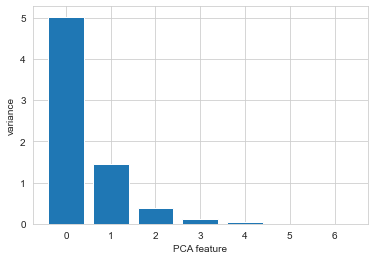

In [45]:
# Gráfica de varianza explicada
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [46]:
# Generemos la instancia indicando el número de componentes a retener
pca = PCA(n_components = 2)

# Ajustamos y transformamos los datos
pca_features = pca.fit_transform(Z_ss)
print(pca_features)
print(pca_features.shape)

[[-7.71567035e-01  1.62417584e-01]
 [-7.68883179e-01  1.66801734e-01]
 [-6.52544577e-01  1.02660549e-01]
 [-6.27517638e-02  2.40804469e-01]
 [ 7.96444834e-01  1.09034905e-01]
 [-7.50601171e-01  1.75250239e-01]
 [-7.65601296e-01  1.59416456e-01]
 [-7.04997517e-01  1.72095406e-01]
 [-7.50737176e-01  1.85087829e-01]
 [-7.26459286e-01  1.24824132e-01]
 [-7.70370147e-01  1.69476613e-01]
 [-4.92861438e-01 -2.29847754e-01]
 [ 2.67202984e-02 -6.54979840e-02]
 [-7.02571430e-01  1.59613074e-01]
 [-7.75298412e-01  1.69298645e-01]
 [-7.58529625e-01  1.48571045e-01]
 [-3.12648211e-01 -3.47469485e-01]
 [ 1.85049372e+00  1.83620303e+00]
 [-7.33803950e-01  1.23023745e-01]
 [-5.72874969e-01  2.43245628e-01]
 [-7.21562118e-01  1.07512710e-01]
 [-4.04646039e-01 -3.07066541e-01]
 [-4.51055842e-01 -1.78775874e-01]
 [-6.64523931e-01  2.69285337e-02]
 [-6.08559467e-01 -5.88007742e-02]
 [-2.22253641e-01 -2.48599139e-01]
 [-7.60479859e-01  1.53575739e-01]
 [-7.65979552e-01  1.58876795e-01]
 [-7.62691169e-01  1

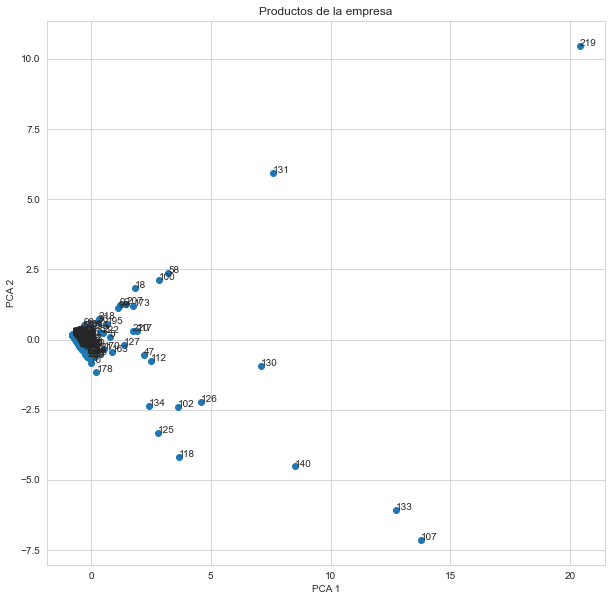

In [47]:
# Asignamos los componentes a dos variables
xs = pca_features[:,0]
ys = pca_features[:,1]

#Extraemos las etiquetas de las entidades
ent = df_prod['Producto']
ent = np.asarray(ent)

# Generemos el diagrama de dispersión
plt.figure(figsize=(10,10))
plt.scatter(xs, ys)

for i, n in enumerate(ent):
    plt.annotate(n, (xs[i], ys[i]))
    
plt.title('Productos de la empresa')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.show()

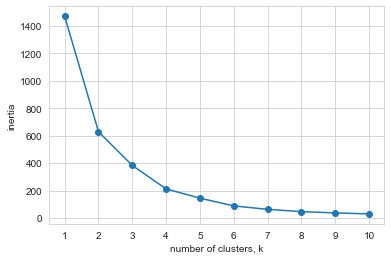

In [48]:
## Probar con distintos números de clústeres y comparar su inercia
ks = range(1, 11)
inertias = []

for k in ks:
    model = KMeans(n_clusters = k)
    model.fit(pca_features)
    inertias.append(model.inertia_)
    
# Gráfico de sedimentación para ver las incercias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 3 0 0 0 1 0 0 0 0 3 0 0
 0 0 3 3 0 0 0 0 0 0 3 3 3 0 0 3 3 0 1 3 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 2 3 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]


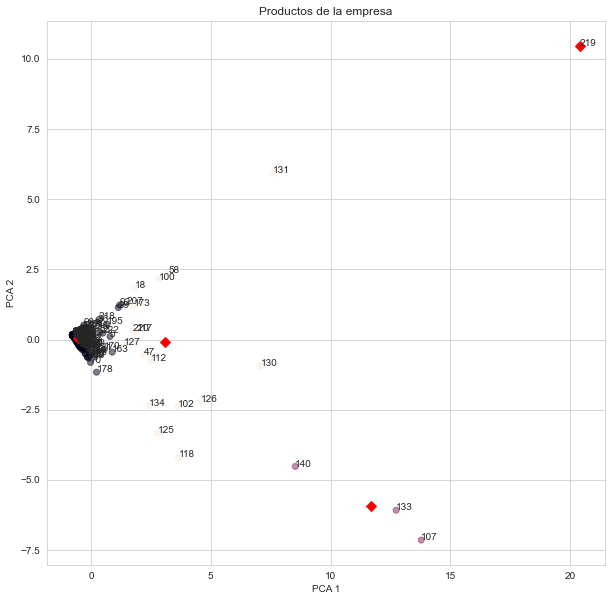

In [49]:
# Generamos nuestra instancia con 5 clústeres
model = KMeans(n_clusters = 4)

# Ajustamos el modelo a nuestros datos y predecimos los centroides
labels = model.fit_predict(pca_features)
print(labels)

# Obtenemos los centroides y separamos sus coordenadas
centroids = model.cluster_centers_

centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Observemos nuevamente nuestro gráfico de dispersión con la clusterización de las entiades federativas
plt.figure(figsize = (10, 10))

plt.scatter(xs, ys, c = labels, alpha = 0.5)
plt.scatter(centroids_x, centroids_y, marker="D", s=50, color = 'red')

for i, n in enumerate(ent):
    plt.annotate(n, (xs[i], ys[i]))
    
plt.title('Productos de la empresa')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [50]:
#Podemos actualizar nuestro DataFrame
df_updated_prod = df_prod
df_updated_prod[['pca1', 'pca2']] = pca_features
df_updated_prod['cluster'] = labels
print(df_updated_prod.head())

   Producto       KG  Precio_Unit_Venta  Ganancia_USD  Ganancia_MXN  \
0         1     50.0             178.13        468.00       8906.37   
1         2    200.0             147.37       1506.00      29474.98   
2         3   1848.0            1268.24      23464.50     282762.22   
3         4  14471.0            2443.20     131541.39    2538009.49   
4         5  33600.0            8119.64     256368.00    4957304.84   

   Costo_Unit_Manufactura         lbs  Costo_Tot_Manufactura      pca1  \
0                   82.93    110.2250                4146.69 -0.771567   
1                   64.86    440.9000               12972.60 -0.768883   
2                  930.56   4073.9160              191058.11 -0.652545   
3                 2186.40  31901.3195             2260669.81 -0.062752   
4                 6299.00  74071.2000             4036627.33  0.796445   

       pca2  cluster  
0  0.162418        0  
1  0.166802        0  
2  0.102661        0  
3  0.240804        0  
4  0.109035  

In [51]:
df_updated_prod.to_csv('Clusters_Productos_KM.csv', index = False)

### Clientes

In [52]:
df_client = df_ns.drop(columns = ['Month','Operacion','Producto','Moneda_de_Venta','Clase','Tipo_de_Cambio'])
df_client = df_client.groupby('Cliente').sum()
df_client = df_client.reset_index(level = ['Cliente'])
df_client.tail(10)

,Cliente,KG,Precio_Unit_Venta,Ganancia_USD,Ganancia_MXN,Costo_Unit_Manufactura,lbs,Costo_Tot_Manufactura
135,146,3500.0,762.96,19890.00,381038.98,480.02,7715.7500,240176.66
136,147,1124.0,3130.09,10992.48,212162.71,1928.54,2477.8580,126042.33
137,148,4445.0,1888.96,30061.00,585527.63,4163.57,9799.0025,1260911.50
138,150,25.0,82.09,2052.25,2052.25,33.99,55.1125,849.86
139,151,21075.0,723.63,78141.25,1504198.26,583.12,46459.8375,1245654.79
140,152,5650.0,1565.18,17783.00,344812.68,1235.29,12455.4250,275278.10
141,153,3265.0,563.84,254404.00,254404.00,475.77,7197.6925,219588.18
142,154,8920.0,16006.14,1755670.25,1755670.25,10608.02,19664.1400,1313668.87
143,155,3375.0,10011.62,60445.00,1160469.84,8152.23,7440.1875,935536.63
144,156,6225.0,3343.43,45274.75,875262.58,2286.15,13723.0125,601408.49


In [53]:
W = df_client.drop(columns = ['Cliente'])
print(W.describe().T)

                        count          mean           std        min  \
KG                      145.0  2.741627e+04  6.391415e+04    25.0000   
Precio_Unit_Venta       145.0  8.585447e+03  4.183124e+04    58.2700   
Ganancia_USD            145.0  4.376292e+05  1.630203e+06    91.2500   
Ganancia_MXN            145.0  3.110910e+06  8.416995e+06  1787.0400   
Costo_Unit_Manufactura  145.0  5.602703e+03  2.803835e+04     0.0000   
lbs                     145.0  6.043916e+04  1.408988e+05    55.1125   
Costo_Tot_Manufactura   145.0  2.081931e+06  5.544473e+06     0.0000   

                               25%        50%           75%           max  
KG                        525.0000    3500.00  2.085000e+04  4.859530e+05  
Precio_Unit_Venta         531.3100    1453.29  4.094360e+03  4.924092e+05  
Ganancia_USD             5456.0000   30250.00  2.306357e+05  1.433586e+07  
Ganancia_MXN            80780.8700  350185.30  2.654765e+06  7.775935e+07  
Costo_Unit_Manufactura    367.8600     966.

In [54]:
# Estandarizar variables
W_ss = ss.fit_transform(W)

W_scaled = pd.DataFrame(W_ss)
print(W_scaled.describe().T.round(2))

   count  mean  std   min   25%   50%   75%    max
0  145.0   0.0  1.0 -0.43 -0.42 -0.38 -0.10   7.20
1  145.0   0.0  1.0 -0.20 -0.19 -0.17 -0.11  11.61
2  145.0   0.0  1.0 -0.27 -0.27 -0.25 -0.13   8.56
3  145.0  -0.0  1.0 -0.37 -0.36 -0.33 -0.05   8.90
4  145.0  -0.0  1.0 -0.20 -0.19 -0.17 -0.10  11.62
5  145.0  -0.0  1.0 -0.43 -0.42 -0.38 -0.10   7.20
6  145.0   0.0  1.0 -0.38 -0.37 -0.33 -0.04   9.90


In [55]:
pca = PCA()
pca.fit(W_ss)

PCA()

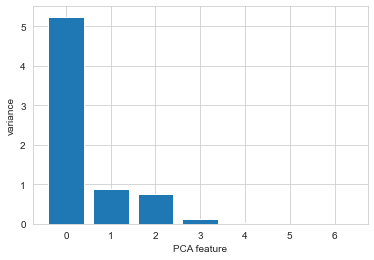

In [56]:
# Gráfica de varianza explicada
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [57]:
# Generemos la instancia indicando el número de componentes a retener
pca = PCA(n_components = 2)

# Ajustamos y transformamos los datos
pca_features = pca.fit_transform(W_ss)
print(pca_features)
print(pca_features.shape)

[[-6.37992752e-01 -1.70812978e-01]
 [-6.66888378e-01 -1.86961464e-01]
 [ 2.42012729e-01 -1.46452743e-01]
 [ 4.38514103e-01 -9.76248485e-02]
 [ 2.02197563e+00 -2.15645501e-01]
 [ 2.29969690e+01 -2.54812927e+00]
 [ 5.58332638e+00  1.13524564e+00]
 [ 3.97587249e-01 -1.62338328e-01]
 [-3.03122905e-01 -1.37808687e-01]
 [ 9.38678689e-01 -5.83871560e-02]
 [-5.69010025e-03 -2.79170412e-01]
 [ 4.24348319e+00  1.52286438e-01]
 [ 1.87962755e+00 -6.82474773e-02]
 [-8.37708160e-01 -1.57155739e-01]
 [ 5.03047909e+00  7.40636477e-02]
 [-8.53032175e-01 -1.51135893e-01]
 [-5.89010743e-01 -1.66737685e-01]
 [-8.17516581e-01 -1.39831040e-01]
 [-8.10407330e-01 -1.64805292e-01]
 [-8.39077365e-01 -1.62123024e-01]
 [-8.53806238e-01 -1.57873193e-01]
 [-7.34480903e-01 -1.65253665e-01]
 [-3.29993965e-01 -2.36303398e-01]
 [-3.93456209e-01 -1.46274308e-01]
 [ 1.22326754e-01 -1.31695764e-01]
 [-8.59934696e-01 -1.57554203e-01]
 [-7.43125053e-01 -1.61922855e-01]
 [ 3.74851971e-01 -1.84843922e-01]
 [ 8.39851297e-01 -1

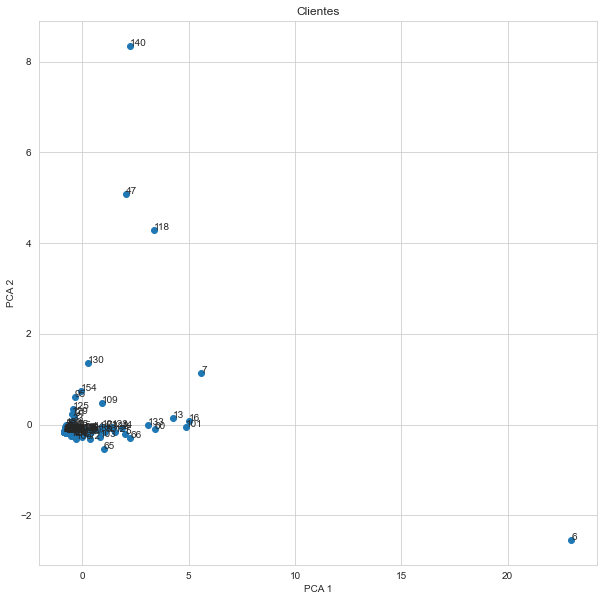

In [58]:
# Asignamos los componentes a dos variables
xs = pca_features[:,0]
ys = pca_features[:,1]

#Extraemos las etiquetas de las entidades
ent = df_client['Cliente']
ent = np.asarray(ent)

# Generemos el diagrama de dispersión
plt.figure(figsize=(10,10))
plt.scatter(xs, ys)

for i, n in enumerate(ent):
    plt.annotate(n, (xs[i], ys[i]))
    
plt.title('Clientes')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.show()

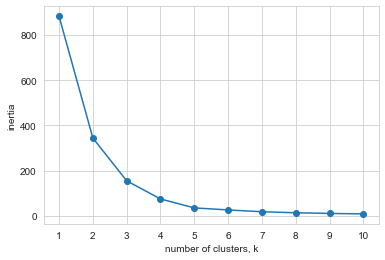

In [59]:
## Probar con distintos números de clústeres y comparar su inercia
ks = range(1, 11)
inertias = []

for k in ks:
    model = KMeans(n_clusters = k)
    model.fit(pca_features)
    inertias.append(model.inertia_)
    
# Gráfico de sedimentación para ver las incercias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

[2 2 2 2 3 1 3 2 2 2 2 3 3 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2
 2 2 3 2 2 2 3 2 2 2 2 2 3 2 2 2 2 3 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


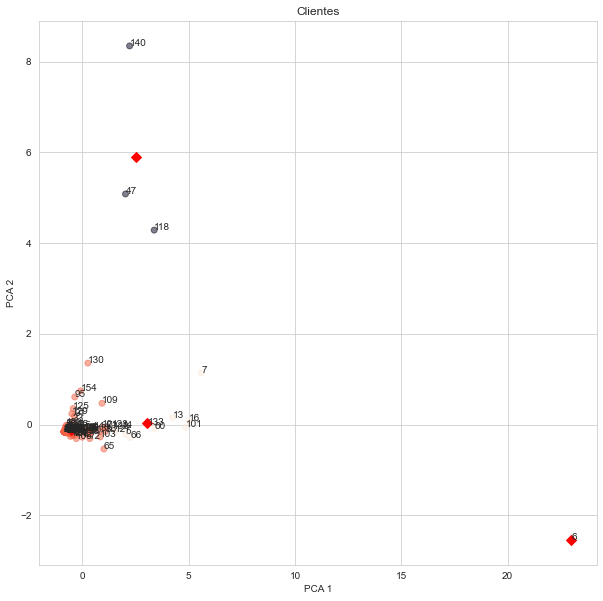

In [60]:
# Generamos nuestra instancia con 5 clústeres
model = KMeans(n_clusters = 4)

# Ajustamos el modelo a nuestros datos y predecimos los centroides
labels = model.fit_predict(pca_features)
print(labels)

# Obtenemos los centroides y separamos sus coordenadas
centroids = model.cluster_centers_

centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Observemos nuevamente nuestro gráfico de dispersión con la clusterización de las entiades federativas
plt.figure(figsize = (10, 10))

plt.scatter(xs, ys, c = labels, alpha = 0.5)
plt.scatter(centroids_x, centroids_y, marker="D", s=50, color = 'red')

for i, n in enumerate(ent):
    plt.annotate(n, (xs[i], ys[i]))
    
plt.title('Clientes')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [61]:
#Podemos actualizar nuestro DataFrame
df_updated_client = df_client
df_updated_client[['pca1', 'pca2']] = pca_features
df_updated_client['cluster'] = labels
print(df_updated_client.head())

   Cliente       KG  Precio_Unit_Venta  Ganancia_USD  Ganancia_MXN  \
0        1   5399.0            4094.36      42496.00     816789.32   
1        2   1923.0            7182.77      35754.40     649150.79   
2        3  60500.0             586.71     138255.00    2654764.62   
3        4  51496.0            4756.88     270176.60    5248130.06   
4        5  66800.0           40559.83     630345.06   12143551.40   

   Costo_Unit_Manufactura          lbs  Costo_Tot_Manufactura      pca1  \
0                 2559.95   11902.0955              491796.17 -0.637993   
1                 3169.48    4239.2535              321781.87 -0.666888   
2                  533.02  133372.2496             2411309.79  0.242013   
3                 3219.81  113522.9320             3581450.13  0.438514   
4                27189.82  147260.6000             8109220.99  2.021976   

       pca2  cluster  
0 -0.170813        2  
1 -0.186961        2  
2 -0.146453        2  
3 -0.097625        2  
4 -0.215646  

In [62]:
df_updated_client.to_csv('Clusters_Clientes_KM.csv', index = False)